# Brain Tumor Segmentation using SLIC

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# img = cv2.imread('C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/181.png', cv2.IMREAD_GRAYSCALE)

# #simple global thresholding
# ret,th1 = cv2.threshold(img,90,255,cv2.THRESH_BINARY)

# plt.figure(figsize=(12,6))
# plt.subplot(121), plt.imshow(img,cmap='gray')
# plt.title('Grayscale Image')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122), plt.imshow(th1,cmap='gray')
# plt.title('Binary Image (Threshold: '+str(ret)+')')
# plt.xticks([]),plt.yticks([])
# plt.show()

In [3]:
# # morphological operations
# kernel = np.ones((5, 5), np.uint8)
# closing = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel, iterations=7)

# # Display the original and the result
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.title('Original Image')
# plt.imshow(th1, cmap='gray')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Morphological Opening')
# plt.imshow(closing, cmap='gray')
# plt.axis('off')

# plt.show()

In [4]:
# import cv2
# import numpy as np
# from skimage.segmentation import mark_boundaries
# from skimage.segmentation import slic
# import matplotlib.pyplot as plt

# # Read the image
# img = cv2.imread('C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/181.png', cv2.IMREAD_COLOR)

# # Convert the image from BGR to RGB (for display with matplotlib)
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # Perform SLIC segmentation
# segments = slic(img, n_segments=100, compactness=10)

# # Create a mask using the segments
# mask = np.zeros_like(img)
# for seg_val in np.unique(segments):
#     mask[segments == seg_val] = np.mean(img[segments == seg_val], axis=(0, 1))

# # Display the original image and SLIC segmentation result
# fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# ax[0].imshow(img_rgb)
# ax[0].set_title('Original Image')

# ax[1].imshow(mark_boundaries(img_rgb, segments))
# ax[1].set_title('SLIC Segmentation')

# plt.show()


In [5]:
!pip install scikit-image
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


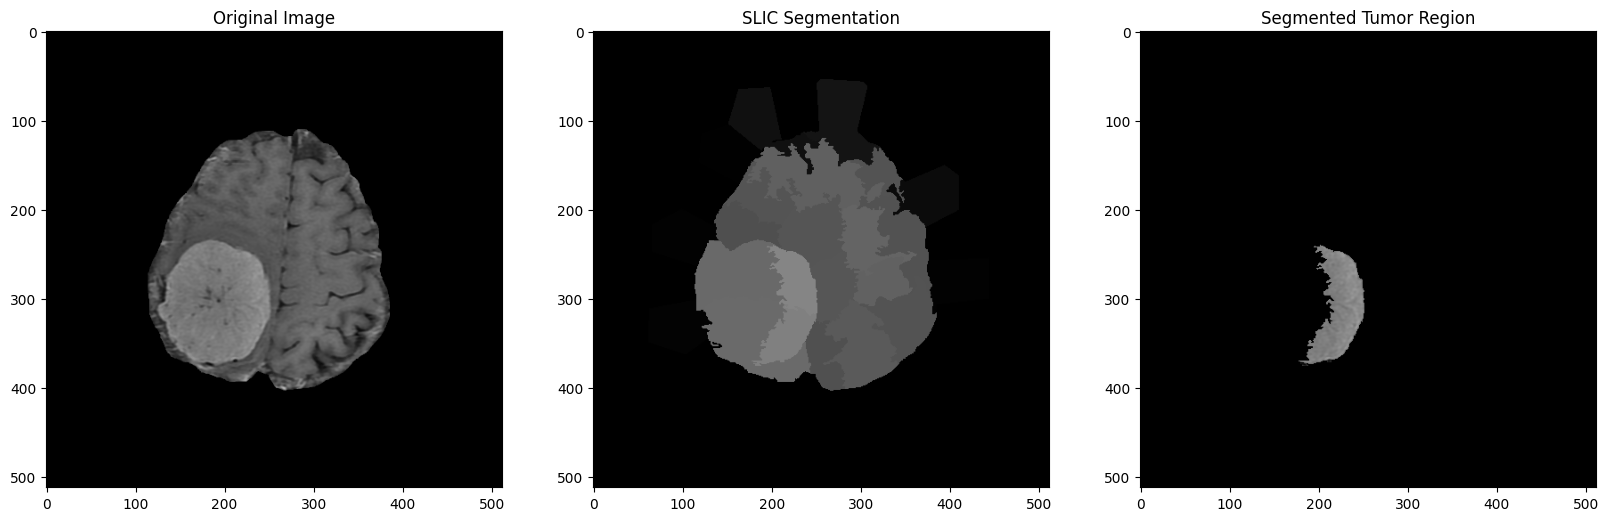

In [14]:
import cv2
import numpy as np
from skimage.segmentation import slic
import matplotlib.pyplot as plt

# Function to segment brain tumor based on highest pixel intensity
def segment_tumor(img):
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Find the maximum pixel intensity in the grayscale image
    max_intensity = np.max(gray_img)
    
    # Threshold the grayscale image to create a mask for the tumor region
    _, tumor_mask = cv2.threshold(gray_img, max_intensity - 10, 255, cv2.THRESH_BINARY)
    
    return tumor_mask

# Read the image
img = cv2.imread('C:/Users/user/Downloads/brain tumor dataset lovesh/images/195.png', cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB (for display with matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform SLIC segmentation
segments = slic(img, n_segments=100, compactness=10)

# Create a mask using the segments
mask = np.zeros_like(img)
for seg_val in np.unique(segments):
    mask[segments == seg_val] = np.mean(img[segments == seg_val], axis=(0, 1))

# Segment the brain tumor based on highest pixel intensity
tumor_mask = segment_tumor(mask)

# Apply the tumor mask to the original image
segmented_tumor = cv2.bitwise_and(img_rgb, img_rgb, mask=tumor_mask)

# Display the original image, SLIC segmentation result, and segmented tumor region
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')

ax[1].imshow(mask)
ax[1].set_title('SLIC Segmentation')

ax[2].imshow(segmented_tumor)
ax[2].set_title('Segmented Tumor Region')

plt.show()

In [7]:
# import cv2
# import numpy as np
# from skimage.segmentation import slic
# from sklearn.metrics import precision_score, recall_score, accuracy_score, jaccard_score
# import os
# import random
# import matplotlib.pyplot as plt

# # Function to perform SLIC segmentation and get tumor region
# # Function to perform SLIC segmentation and get tumor region
# def get_tumor_region(internal_info):
#     segments_internal = slic(internal_info, n_segments=100, compactness=10)
#     mask_internal = np.zeros_like(internal_info)

#     for seg_val in np.unique(segments_internal):
#         mask_internal[segments_internal == seg_val] = np.mean(internal_info[segments_internal == seg_val], axis=(0, 1))

#     hsv_mask_internal = cv2.cvtColor(mask_internal, cv2.COLOR_BGR2HSV)
#     lower_bound_internal = np.array([0, 0, 100], dtype=np.uint8)
#     upper_bound_internal = np.array([255, 255, 255], dtype=np.uint8)
#     tumor_mask_internal = cv2.inRange(hsv_mask_internal, lower_bound_internal, upper_bound_internal)

#     kernel_internal = np.ones((5, 5), np.uint8)
#     tumor_mask_internal = cv2.morphologyEx(tumor_mask_internal, cv2.MORPH_CLOSE, kernel_internal)
#     tumor_mask_internal = cv2.morphologyEx(tumor_mask_internal, cv2.MORPH_OPEN, kernel_internal)

#     contours_internal, _ = cv2.findContours(tumor_mask_internal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     if contours_internal:
#         largest_contour_internal = max(contours_internal, key=cv2.contourArea)
#         tumor_mask_internal = np.zeros_like(tumor_mask_internal)
#         cv2.drawContours(tumor_mask_internal, [largest_contour_internal], -1, (255), thickness=cv2.FILLED)

#     return tumor_mask_internal

# import warnings

# def evaluate_segmentation(gt_mask, predicted_mask):
#     # Map pixel values to binary labels (0 and 1)
#     gt_mask_binary = (gt_mask > 0).astype(np.uint8)
#     predicted_mask_binary = (predicted_mask > 0).astype(np.uint8)

#     # Suppress warning messages
#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore")
#         precision = precision_score(gt_mask_binary.flatten(), predicted_mask_binary.flatten(), average='binary')
#         recall = recall_score(gt_mask_binary.flatten(), predicted_mask_binary.flatten(), average='binary')
#         accuracy = accuracy_score(gt_mask_binary.flatten(), predicted_mask_binary.flatten())
#         iou = jaccard_score(gt_mask_binary.flatten(), predicted_mask_binary.flatten(), average='binary')

#     return precision, recall, accuracy, iou

# # Function to process a single image
# def process_image(image_path, gt_mask_path):
#     img = cv2.imread(image_path, cv2.IMREAD_COLOR)
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#     segments = slic(img, n_segments=100, compactness=10)
#     mask = np.zeros_like(img)

#     for seg_val in np.unique(segments):
#         mask[segments == seg_val] = np.mean(img[segments == seg_val], axis=(0, 1))

#     hsv_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)
#     lower_bound = np.array([0, 0, 100], dtype=np.uint8)
#     upper_bound = np.array([255, 255, 255], dtype=np.uint8)
#     tumor_mask = cv2.inRange(hsv_mask, lower_bound, upper_bound)

#     kernel = np.ones((5, 5), np.uint8)
#     tumor_mask = cv2.morphologyEx(tumor_mask, cv2.MORPH_CLOSE, kernel)
#     tumor_mask = cv2.morphologyEx(tumor_mask, cv2.MORPH_OPEN, kernel)

#     contours, _ = cv2.findContours(tumor_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     if contours:
#         largest_contour = max(contours, key=cv2.contourArea)
#         tumor_mask = np.zeros_like(tumor_mask)
#         cv2.drawContours(tumor_mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

#     segmented_image = cv2.bitwise_and(img_rgb, img_rgb, mask=tumor_mask)
#     internal_info = cv2.subtract(img_rgb, cv2.cvtColor(tumor_mask, cv2.COLOR_GRAY2RGB))
#     tumor_mask_internal = get_tumor_region(internal_info)
#     segmented_image_internal = cv2.bitwise_and(internal_info, internal_info, mask=tumor_mask_internal)

#     # Read the ground truth mask
#     gt_mask = cv2.imread(gt_mask_path, cv2.IMREAD_GRAYSCALE)

#     # Evaluate segmentation results
#     precision, recall, accuracy, iou = evaluate_segmentation(gt_mask, tumor_mask_internal)

#     return precision, recall, accuracy, iou, img_rgb, segmented_image

# # Folder paths
# image_folder = 'C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images'
# gt_mask_folder = 'C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/masks'

# # Initialize lists to store evaluation results
# precisions, recalls, accuracies, ious = [], [], [], []

# # Process each image in the folder
# for filename in os.listdir(image_folder):
#     if filename.endswith(".png"):
#         image_path = os.path.join(image_folder, filename)
#         gt_mask_path = os.path.join(gt_mask_folder, filename)  # Assuming ground truth mask filenames match image filenames

#         # Process the image
#         precision, recall, accuracy, iou, img_rgb, segmented_image = process_image(image_path, gt_mask_path)

#         # Append results to lists
#         precisions.append(precision)
#         recalls.append(recall)
#         accuracies.append(accuracy)
#         ious.append(iou)

# # Calculate average scores
# avg_precision = np.mean(precisions)
# avg_recall = np.mean(recalls)
# avg_accuracy = np.mean(accuracies)
# avg_iou = np.mean(ious)

# # Display average scores
# print(f'Average Precision: {avg_precision:.4f}')
# print(f'Average Recall: {avg_recall:.4f}')
# print(f'Average Accuracy: {avg_accuracy:.4f}')
# print(f'Average IoU: {avg_iou:.4f}')

# # Randomly select an image for display
# random_index = random.randint(0, len(os.listdir(image_folder)) - 1)
# random_image_path = os.path.join(image_folder, os.listdir(image_folder)[random_index])
# random_gt_mask_path = os.path.join(gt_mask_folder, os.listdir(gt_mask_folder)[random_index])

# # Process the randomly selected image
# _, _, _, _, random_original_image, random_segmented_image = process_image(random_image_path, random_gt_mask_path)

# # Display random original and segmented images
# fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# ax[0].imshow(random_original_image)
# ax[0].set_title('Random Original Image')

# ax[1].imshow(random_segmented_image)
# ax[1].set_title('Random Segmented Image')

# plt.show()
